In [6]:
import json
import os

DIRS = ["biorxiv_medrxiv", "comm_use_subset", "custom_license", "noncomm_use_subset"]
docs = []

for DIR in DIRS:
    for file in os.listdir(f'{DIR}/{DIR}'):
        path = f'{DIR}/{DIR}/{file}'
        j = json.load(open(path, 'rb'))
        title = j['metadata']['title']

        try:
            abstract = j['abstract'][0]['text']
        except:
            abstract = []

        full_text = ""
        for text in j["body_text"]:
            full_text += text['text'] + '\n\n'

        docs.append([title, abstract, full_text])


In [7]:
for i in docs:
    print("TITLE: \n", i[0])
    print("ABSTRACT: \n", i[1])
    print("TEXT: \n", i[2][0:200])
    break

TITLE: 
 The RNA pseudoknots in foot-and-mouth disease virus are dispensable for genome replication but essential for the production of infectious virus. 2 3
ABSTRACT: 
 word count: 194 22 Text word count: 5168 23 24 25 author/funder. All rights reserved. No reuse allowed without permission. Abstract 27 The positive stranded RNA genomes of picornaviruses comprise a single large open reading 28 frame flanked by 5′ and 3′ untranslated regions (UTRs). Foot-and-mouth disease virus (FMDV) 29 has an unusually large 5′ UTR (1.3 kb) containing five structural domains. These include the 30 internal ribosome entry site (IRES), which facilitates initiation of translation, and the cis-acting 31 replication element (cre). Less well characterised structures are a 5′ terminal 360 nucleotide 32 stem-loop, a variable length poly-C-tract of approximately 100-200 nucleotides and a series of 33 two to four tandemly repeated pseudoknots (PKs). We investigated the structures of the PKs 34 by selective 2′ hy

In [8]:
import pandas as pd

df = pd.DataFrame(docs, columns=['title', 'abstract', 'text'])
df.to_csv("COVID.csv")
df

,title,abstract,text
0,The RNA pseudoknots in foot-and-mouth disease ...,word count: 194 22 Text word count: 5168 23 24...,"VP3, and VP0 (which is further processed to VP..."
1,Analysis Title: Regaining perspective on SARS-...,"During the past three months, a new coronaviru...","In December 2019, a novel coronavirus, SARS-Co..."
2,Healthcare-resource-adjusted vulnerabilities t...,[],The 2019-nCoV epidemic has spread across China...
3,"Real-time, MinION-based, amplicon sequencing f...",Infectious bronchitis (IB) causes significant ...,"Infectious bronchitis (IB), which is caused by..."
4,A Combined Evidence Approach to Prioritize Nip...,Nipah Virus (NiV) came into limelight recently...,Nipah is an infectious negative-sense single-s...
...,...,...,...
33370,Understanding Human Coronavirus HCoV-NL63,Even though coronavirus infection of humans is...,"Regardless of geographic location, respiratory..."
33371,Brief Definitive Report MACROPHAGES GENETICALL...,There is extensive evidence that cultured macr...,Experiments were designed to test whether subs...
33372,Identification of a Subdomain of CENPB That Is...,We have combined in vivo and in vitro approach...,"can function in an autonomous fashion, relocat..."
33373,Replication enhancer elements within the open ...,We provide experimental evidence of a replicat...,Tick-borne encephalitis virus (TBEV) is a huma...


In [9]:
import re

inc = df['text'].str.contains("incubation")
inc = df[inc]
texts = inc['text'].values

inc_days = []

for t in texts:
    tt = t.split(".")
    for text in tt:
        if 'incubation' in text:
#             print(text)
            day = re.findall(r" \d{1,2} day", text)
            if day != []:
                n = day[0].split(" ")
                inc_days.append(int(n[1]))
# inc_days

Mean: 9.623835213339872


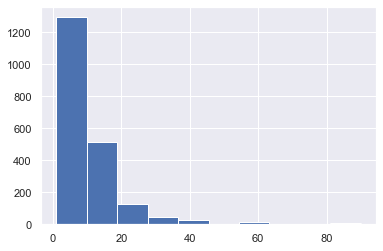

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set()

plt.hist(inc_days)
print(f"Mean: {np.mean(inc_days)}")